<a href="https://colab.research.google.com/github/huzaifa003/NewsMachineLearning/blob/main/NewsClustersWithWordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Urdu_NLP/news_20k.csv')

In [4]:
data

,Unnamed: 0,Index,Headline,News Text,Category,Date,URL,Source,News length
0,276152,276152,لاہورہائیکورٹ نے محکمہ مال کو زرعی مدن ٹیکس کی...,لاہوراردو پوائنٹ اخبارتازہ ترین لائن16 مئی2016...,Business & Economics,NaN,https://www.urdupoint.com/business/news-detail...,Urdu Point News,542.0
1,257971,257971,زرعی شعبہ میں تحقیقی سرگرمیوں کے فروغ کے لئی12...,اسلام اباد اردو پوائنٹ اخبارتازہ ترین اے پی پی...,Business & Economics,10 مارچ2017ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,698.0
2,217973,217973,ایشین سٹاک مارکیٹس میں مندی,ہانگ کانگ اردو پوائنٹ اخبارتازہ ترین اے پی پی ...,Business & Economics,16 ستمبر2019ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,310.0
3,297403,297403,کراچی پاکستان پیٹر ولئیم کیعمومی شئیرکیپٹل پر7...,کراچی اردو پوائنٹ اخبار تازہ ترین24 اکتوبر2014...,Business & Economics,NaN,https://www.urdupoint.com/business/news-detail...,Urdu Point News,1663.0
4,1002075,1002075,اسٹاک مارکیٹ انڈیکس میں86 پوائنٹس کمی سرمایہ م...,کراچیکامرس رپورٹر پاکستان اسٹاک ایکسچینج پی ای...,Business & Economics,"Jun 30, 2018",https://www.nawaiwaqt.com.pk/30-Jun-2018/855776,Nawai Waqt News,1210.0
...,...,...,...,...,...,...,...,...,...
3058,1012418,1012418,کپاس کے پیداواری ہدف میں کمی کے منفی اثرات مرت...,کراچیکامرس رپورٹرپاکستان بزنس مین اینڈ انٹلیکچ...,Business & Economics,"Jan 24, 2017",https://www.nawaiwaqt.com.pk/24-Jan-2017/558087,Nawai Waqt News,1432.0
3059,727064,727064,تیل وگیس کے شعبہ میں براہ راست غیرملکی سرمایہ ...,اسلام باد13اکتوبر اے پی پی ملک میں تیل وگیس کے...,Business & Economics,2020-10-13,https://urdu.app.com.pk/urdu/2020/10/%d8%aa%db...,app news,832.0
3060,295713,295713,پی ئی اے کو خسارے سے نکال کر بہترین منافع بخش ...,نواب شاہ اردو پوائنٹ تاز ترین اخبار 27نومبر 20...,Business & Economics,27نومبر 2014ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,1728.0
3061,1037306,1037306,کراچی اور لاہور سٹاک مارکیٹوں میں تیزی,کراچی لاہور مارکیٹ رپورٹر کامرس رپورٹر کے ایس ...,Business & Economics,"Nov 21, 2009",https://www.nawaiwaqt.com.pk/21-Nov-2009/2854,Nawai Waqt News,254.0


In [51]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Urdu_NLP/news_20k.csv'
df = pd.read_csv(file_path)

# Text Cleaning (example, might need adjustments based on the actual text)
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

urdu_stopwords = [
    'اور', 'میں', 'کو', 'سے', 'کے', 'ہیں', 'کا', 'کہ', 'یہ', 'پر', 'ایک', 'گی', 'جو', 'نے', 'بھی', 'ہے'
]
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join(word for word in text.split() if word not in urdu_stopwords)
    return text

df['cleaned_text'] = df['News Text'].apply(clean_text)

# Check the cleaned text
print(df['cleaned_text'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    لاہوراردو پوائنٹ اخبارتازہ ترین لائن مئیءلاہور...
1    اسلام اباد اردو پوائنٹ اخبارتازہ ترین اے پی پی...
2    ہانگ کانگ اردو پوائنٹ اخبارتازہ ترین اے پی پی ...
3    کراچی اردو پوائنٹ اخبار تازہ ترین اکتوبرء پاکس...
4    کراچیکامرس رپورٹر پاکستان اسٹاک ایکسچینج پی ای...
Name: cleaned_text, dtype: object


In [52]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['cleaned_text'])

# Check the shape of the TF-IDF matrix
print(X.shape)


(20000, 1000)


In [53]:
# Clustering using K-Means
num_clusters = len(df['Category'].unique())  # Choose an appropriate number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

# Check the distribution of clusters
print(df['cluster'].value_counts())
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
2    12384
0     3729
1     2134
3     1753
Name: count, dtype: int64


,Unnamed: 0,Index,Headline,News Text,Category,Date,URL,Source,News length,cleaned_text,cluster
0,276152,276152,لاہورہائیکورٹ نے محکمہ مال کو زرعی مدن ٹیکس کی...,لاہوراردو پوائنٹ اخبارتازہ ترین لائن16 مئی2016...,Business & Economics,NaN,https://www.urdupoint.com/business/news-detail...,Urdu Point News,542,لاہوراردو پوائنٹ اخبارتازہ ترین لائن مئیءلاہور...,2
1,257971,257971,زرعی شعبہ میں تحقیقی سرگرمیوں کے فروغ کے لئی12...,اسلام اباد اردو پوائنٹ اخبارتازہ ترین اے پی پی...,Business & Economics,10 مارچ2017ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,698,اسلام اباد اردو پوائنٹ اخبارتازہ ترین اے پی پی...,2
2,217973,217973,ایشین سٹاک مارکیٹس میں مندی,ہانگ کانگ اردو پوائنٹ اخبارتازہ ترین اے پی پی ...,Business & Economics,16 ستمبر2019ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,310,ہانگ کانگ اردو پوائنٹ اخبارتازہ ترین اے پی پی ...,1
3,297403,297403,کراچی پاکستان پیٹر ولئیم کیعمومی شئیرکیپٹل پر7...,کراچی اردو پوائنٹ اخبار تازہ ترین24 اکتوبر2014...,Business & Economics,NaN,https://www.urdupoint.com/business/news-detail...,Urdu Point News,1663,کراچی اردو پوائنٹ اخبار تازہ ترین اکتوبرء پاکس...,2
4,1002075,1002075,اسٹاک مارکیٹ انڈیکس میں86 پوائنٹس کمی سرمایہ م...,کراچیکامرس رپورٹر پاکستان اسٹاک ایکسچینج پی ای...,Business & Economics,"Jun 30, 2018",https://www.nawaiwaqt.com.pk/30-Jun-2018/855776,Nawai Waqt News,1210,کراچیکامرس رپورٹر پاکستان اسٹاک ایکسچینج پی ای...,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,783295,783295,شاداب خان کی شعیب ملک اور ثانیہ مرزا کوشادی کی...,لاہور ڈیلی پاکستان لائن قومی کرکٹ ٹیم کے کھلاڑ...,Sports,"Apr 13, 2018 | 19:22:PM",https://dailypakistan.com.pk/13-Apr-2018/764149,Daily Pakistan com PK News,924,لاہور ڈیلی پاکستان لائن قومی کرکٹ ٹیم کھلاڑی ش...,2
19996,337160,337160,کراچی یوم دفاع پاکستان شوٹنگ بال فیسٹیول میچ ک...,کراچیاردو پوائنٹ اخبارتازہ ترین این این ئی 05 ...,Sports,جمعرات 5 ستمبر 2019 23:07,https://www.urdupoint.com/sports/detail-news/l...,Urdu Point News,649,کراچیاردو پوائنٹ اخبارتازہ ترین این این ئی ستم...,2
19997,455410,455410,ازبکستان کے ڈینس ایسٹومین سٹریا کے جوئرگن میلز...,برسبیناردو پوائنٹ اخبار تازہ ترینئی این پی3جنو...,Sports,جمعرات 3 جنوری 2013 19:35,https://www.urdupoint.com/sports/detail-news/l...,Urdu Point News,503,برسبیناردو پوائنٹ اخبار تازہ ترینئی این پیجنور...,0
19998,607986,607986,ورلڈ کپ مہم میں انگلینڈ کا فاتحانہ اغاز,لندندنیائے کرکٹ کے سب سے بڑے ایونٹ کے افتتاحی ...,Sports,30-May-19,https://www.humnews.pk/latest/168145/,HUM News,4307,لندندنیائے کرکٹ سب بڑے ایونٹ افتتاحی میچ انگلی...,0


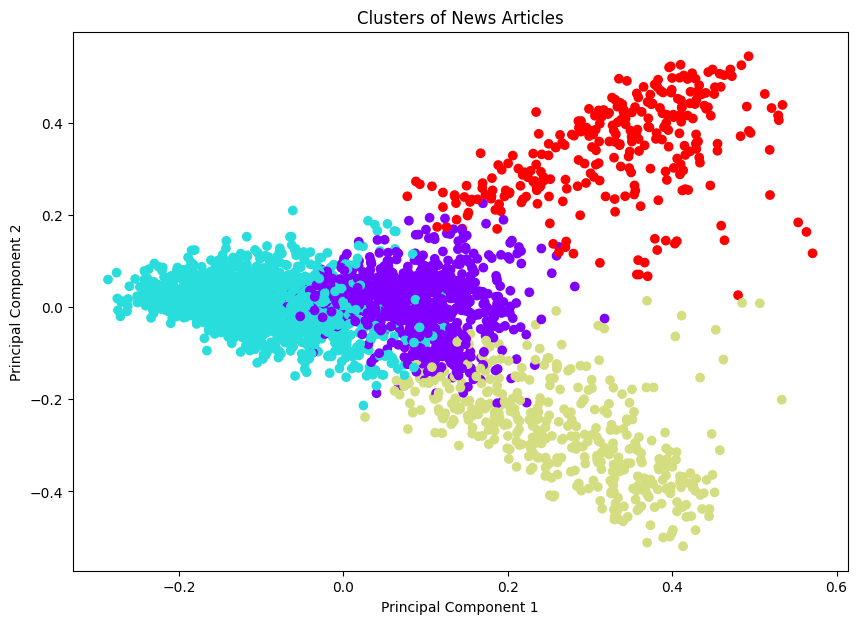

In [23]:
# Visualizing the clusters (optional)
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['cluster'], cmap='rainbow')
plt.title('Clusters of News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [10]:
# Elbow method to find the best value of k
wcss = []  # Within-cluster sum of squares
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

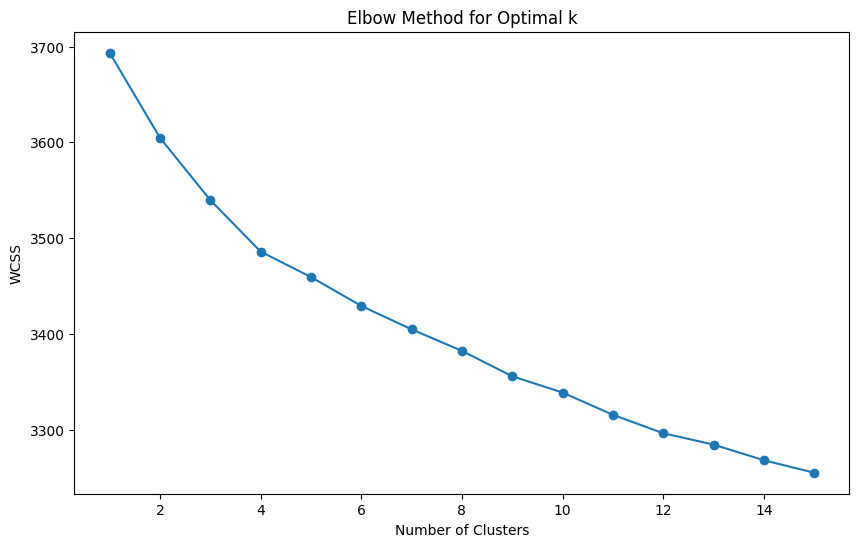

In [12]:
# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [54]:
# Choose the best cluster number from the elbow plot
best_k = 4  # Example, this should be chosen based on where the elbow occurs in the plot

# Apply KMeans with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Check the distribution of clusters and display the updated dataframe
print(df['cluster'].value_counts())
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
2    12384
0     3729
1     2134
3     1753
Name: count, dtype: int64


,Unnamed: 0,Index,Headline,News Text,Category,Date,URL,Source,News length,cleaned_text,cluster
0,276152,276152,لاہورہائیکورٹ نے محکمہ مال کو زرعی مدن ٹیکس کی...,لاہوراردو پوائنٹ اخبارتازہ ترین لائن16 مئی2016...,Business & Economics,NaN,https://www.urdupoint.com/business/news-detail...,Urdu Point News,542,لاہوراردو پوائنٹ اخبارتازہ ترین لائن مئیءلاہور...,2
1,257971,257971,زرعی شعبہ میں تحقیقی سرگرمیوں کے فروغ کے لئی12...,اسلام اباد اردو پوائنٹ اخبارتازہ ترین اے پی پی...,Business & Economics,10 مارچ2017ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,698,اسلام اباد اردو پوائنٹ اخبارتازہ ترین اے پی پی...,2
2,217973,217973,ایشین سٹاک مارکیٹس میں مندی,ہانگ کانگ اردو پوائنٹ اخبارتازہ ترین اے پی پی ...,Business & Economics,16 ستمبر2019ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,310,ہانگ کانگ اردو پوائنٹ اخبارتازہ ترین اے پی پی ...,1
3,297403,297403,کراچی پاکستان پیٹر ولئیم کیعمومی شئیرکیپٹل پر7...,کراچی اردو پوائنٹ اخبار تازہ ترین24 اکتوبر2014...,Business & Economics,NaN,https://www.urdupoint.com/business/news-detail...,Urdu Point News,1663,کراچی اردو پوائنٹ اخبار تازہ ترین اکتوبرء پاکس...,2
4,1002075,1002075,اسٹاک مارکیٹ انڈیکس میں86 پوائنٹس کمی سرمایہ م...,کراچیکامرس رپورٹر پاکستان اسٹاک ایکسچینج پی ای...,Business & Economics,"Jun 30, 2018",https://www.nawaiwaqt.com.pk/30-Jun-2018/855776,Nawai Waqt News,1210,کراچیکامرس رپورٹر پاکستان اسٹاک ایکسچینج پی ای...,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,783295,783295,شاداب خان کی شعیب ملک اور ثانیہ مرزا کوشادی کی...,لاہور ڈیلی پاکستان لائن قومی کرکٹ ٹیم کے کھلاڑ...,Sports,"Apr 13, 2018 | 19:22:PM",https://dailypakistan.com.pk/13-Apr-2018/764149,Daily Pakistan com PK News,924,لاہور ڈیلی پاکستان لائن قومی کرکٹ ٹیم کھلاڑی ش...,2
19996,337160,337160,کراچی یوم دفاع پاکستان شوٹنگ بال فیسٹیول میچ ک...,کراچیاردو پوائنٹ اخبارتازہ ترین این این ئی 05 ...,Sports,جمعرات 5 ستمبر 2019 23:07,https://www.urdupoint.com/sports/detail-news/l...,Urdu Point News,649,کراچیاردو پوائنٹ اخبارتازہ ترین این این ئی ستم...,2
19997,455410,455410,ازبکستان کے ڈینس ایسٹومین سٹریا کے جوئرگن میلز...,برسبیناردو پوائنٹ اخبار تازہ ترینئی این پی3جنو...,Sports,جمعرات 3 جنوری 2013 19:35,https://www.urdupoint.com/sports/detail-news/l...,Urdu Point News,503,برسبیناردو پوائنٹ اخبار تازہ ترینئی این پیجنور...,0
19998,607986,607986,ورلڈ کپ مہم میں انگلینڈ کا فاتحانہ اغاز,لندندنیائے کرکٹ کے سب سے بڑے ایونٹ کے افتتاحی ...,Sports,30-May-19,https://www.humnews.pk/latest/168145/,HUM News,4307,لندندنیائے کرکٹ سب بڑے ایونٹ افتتاحی میچ انگلی...,0


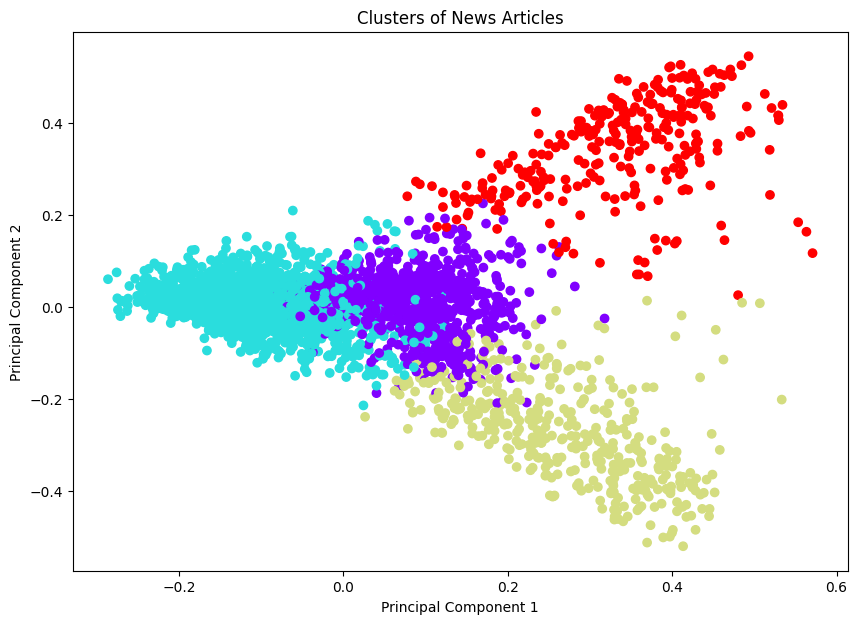

In [25]:
# Visualizing the clusters (optional)
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['cluster'], cmap='rainbow')
plt.title('Clusters of News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [46]:
import numpy as np
def get_top_features_cluster(tfidf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label)  # indices for each cluster
        x_means = np.mean(tfidf_array[id_temp], axis=0)  # mean tf-idf value for each feature in the cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats]  # indices with top features
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns=['features', 'score'])
        dfs.append(df)
    return dfs

# Assuming X is your TF-IDF matrix and kmeans.labels_ are your cluster labels
top_features_per_cluster = get_top_features_cluster(X.toarray(), kmeans.labels_, 10)
for num, df in enumerate(top_features_per_cluster):
    print(f"Cluster {num} top words:")
    print(df)


Cluster 0 top words:
  features     score
0       کی  0.166970
1     روپے  0.048470
2       اس  0.046530
3  پاکستان  0.046165
4      کہا  0.044887
5      کیا  0.034968
6       سی  0.033987
7     کرنے  0.033456
8       کر  0.033079
9   سرمایہ  0.031374
Cluster 1 top words:
  features     score
0       کی  0.128638
1     روپے  0.055545
2       پی  0.041055
3     ڈالر  0.036548
4     فیصد  0.032740
5       فی  0.031578
6     قیمت  0.030877
7      کمی  0.030491
8  پاکستان  0.030067
9       کر  0.028227
Cluster 2 top words:
  features     score
0       کی  0.275261
1      بجٹ  0.229733
2     ٹیکس  0.198463
3    حکومت  0.159880
4     نہیں  0.152434
5       اس  0.139122
6      نمو  0.106256
7     شعبے  0.099850
8    چاہیے  0.095490
9      بہت  0.094260
Cluster 3 top words:
  features     score
0       کی  0.190349
1       اس  0.070096
2  پاکستان  0.063716
3      کہا  0.058890
4     کرنے  0.050718
5       سی  0.047966
6    انہوں  0.046813
7      لیے  0.045682
8      کیا  0.045406
9       کر  0

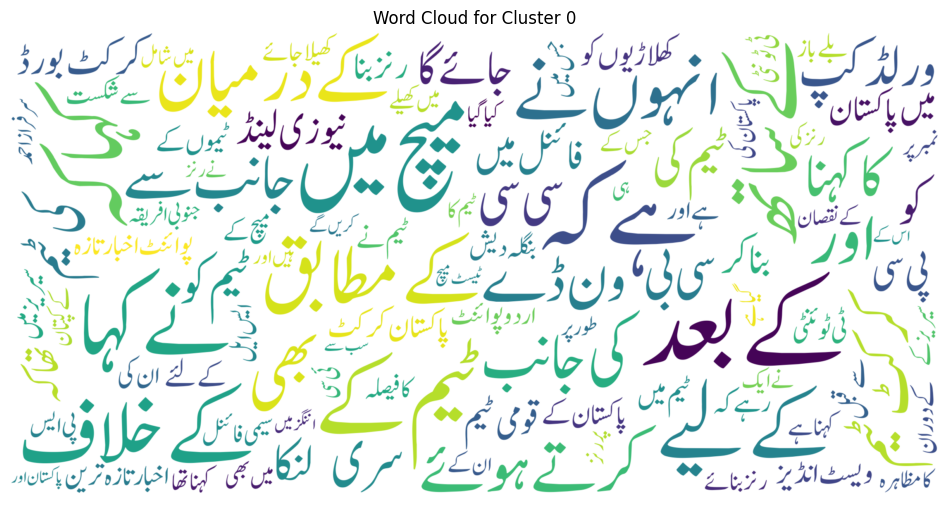

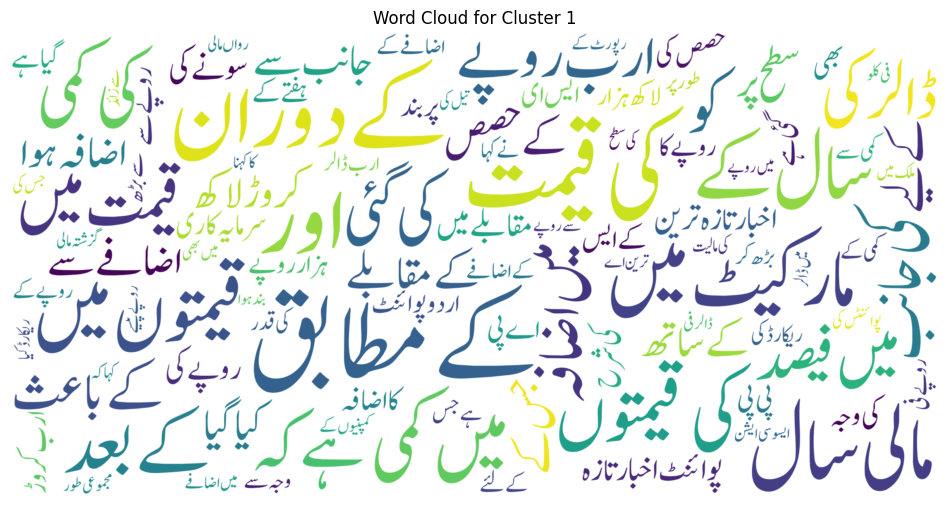

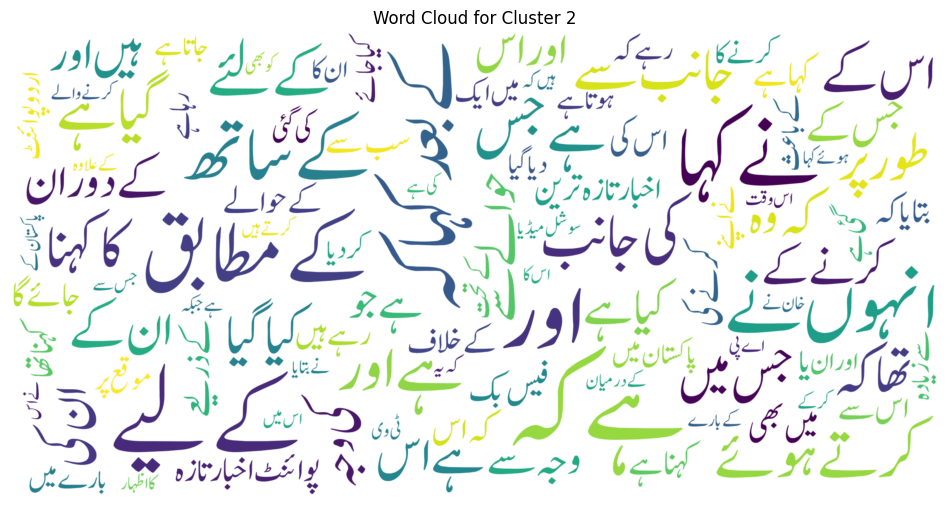

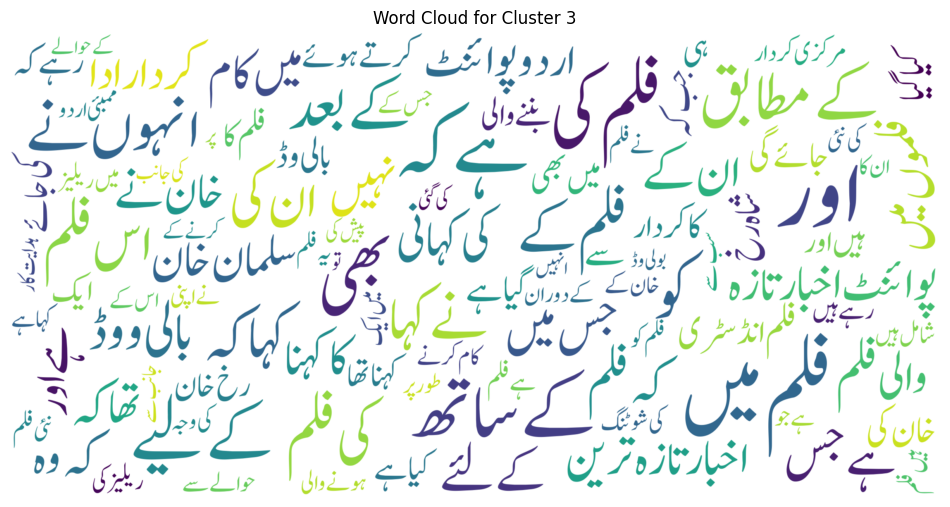

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Specify the font path
font_path = "/content/drive/MyDrive/Urdu_NLP/Jameel Noori Nastaleeq Regular.ttf"

# Generate a word cloud for each cluster
best_k = 4  # Ensure this is set to the number of clusters you have
for i in range(best_k):
    plt.figure(figsize=(12, 10))  # Increased figure size for better visibility
    cluster_text = ' '.join(df[df['cluster'] == i]['News Text'])
    wordcloud = WordCloud(font_path=font_path,
                          width=800,  # Increasing width
                          height=400,  # Increasing height
                          max_font_size=100,  # Increased max font size for better clarity
                          max_words=100,
                          background_color="white",
                          scale=3)  # Increase scale to improve resolution
    wordcloud.generate(cluster_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {i}')
    plt.show()


In [26]:
df.sort_values(by='cluster')

,Unnamed: 0,Index,Headline,News Text,Category,Date,URL,Source,News length,cleaned_text,cluster
1026,224477,224477,ملک میں تھری اور فور جی صارفین کی تعداد میں 26...,اسلام اباد اردو پوائنٹ اخبارتازہ ترین اے پی پی...,Business & Economics,02 جنوری2019ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,629.0,اسلام اباد اردو پوائنٹ اخبارتازہ ترین اے پی پی...,0
2971,286378,286378,فوجی فرٹیلائزر بن قاسم لمیٹڈکا 30جون کو ختم ہو...,اسلام باد 30 جولائی اردو پوائنٹ اخبار تازہ تری...,Business & Economics,NaN,https://www.urdupoint.com/business/news-detail...,Urdu Point News,583.0,اسلام باد جولائی اردو پوائنٹ اخبار تازہ ترین ج...,0
1096,254889,254889,کینیڈین کینولا کے نرخوں میں اضافہ,اوٹاوا اردو پوائنٹ اخبارتازہ ترین اے پی پی 23 ...,Business & Economics,23 اپریل2017ء,https://www.urdupoint.com/business/news-detail...,Urdu Point News,365.0,اوٹاوا اردو پوائنٹ اخبارتازہ ترین اے پی پی اپر...,0
2974,1033997,1033997,بجٹ خسارہ پورا کرنے کے لئے وفاقی حکومت نے بنکو...,لاہور کامرس رپورٹر وفاقی حکومت نے اپنا بجٹ خسا...,Business & Economics,"Dec 14, 2011",https://www.nawaiwaqt.com.pk/14-Dec-2011/8074,Nawai Waqt News,250.0,لاہور کامرس رپورٹر وفاقی حکومت اپنا بجٹ خسارہ ...,0
2976,1033781,1033781,ناقص پالیسیوں کے باعث بیرونی سرمایہ کاری میں 6...,لاہور کامرس رپورٹر پیپلزپارٹی کی حکومت کی ناقص...,Business & Economics,"Jan 18, 2012",https://www.nawaiwaqt.com.pk/18-Jan-2012/8435,Nawai Waqt News,455.0,لاہور کامرس رپورٹر پیپلزپارٹی کی حکومت کی ناقص...,0
...,...,...,...,...,...,...,...,...,...,...,...
473,2100,2100,الیکشن سے قبل اسٹاک مارکیٹ میں مسلسل تیزی,پاکستان اسٹاک ایکسچینج پی ایس ایکس میں کاروبار...,Business & Economics,2018-07-19,https://www.dawnnews.tv/news/1082870/,Dawn News,1284.0,پاکستان اسٹاک ایکسچینج پی ایس ایکس کاروباری ہف...,3
899,304853,304853,کراچی اسٹاک ایکسچینج میں اتار چڑھا کے بعد مندی...,کراچی اردو پوائنٹ اخبار تازہ ترین17 نومبر 2009...,Business & Economics,NaN,https://www.urdupoint.com/business/news-detail...,Urdu Point News,2336.0,کراچی اردو پوائنٹ اخبار تازہ ترین نومبر ءلیکوی...,3
3150,118547,118547,کراچی اسٹاک مارکیٹ میں تیزی نفسیاتی حدیں بحال,انڈیکس 258 پوائنٹس بڑھ کر31750 ہو گیا 380 کمپن...,Business & Economics,بدھ 24 دسمبر 2014,https://www.express.pk/story/312605,Express News,1850.0,انڈیکس پوائنٹس بڑھ کر ہو گیا کمپنیوں کاروبار د...,3
3148,116260,116260,گزشتہ ہفتے حصص مارکیٹ میں تیزی سے انڈیکس کی5حد...,گزشتہ ہفتے کے دوران کے ایس ای 100 انڈیکس میں51...,Business & Economics,پير 11 اپريل 2016,https://www.express.pk/story/489064,Express News,2093.0,گزشتہ ہفتے دوران ایس ای انڈیکس پوائنٹس اضافہ ر...,3


In [42]:
# X_length = df['News length']
# X_length.dropna(inplace=True)  # Drop missing values
# print(X_length.shape)
# # Choose the best cluster number from the elbow plot
# best_k = 4  # Example, this should be chosen based on where the elbow occurs in the plot

# # Apply KMeans with the best number of clusters
# kmeans = KMeans(n_clusters=best_k, random_state=42)
# # Reshape X_length to a 2D array for KMeans
# X_length_reshaped = X_length.values.reshape(-1, 1)
# kmeans.fit(X_length_reshaped) # Pass the reshaped array to the fit method
# df_length = pd.DataFrame(X_length_reshaped, columns=['News length'])
# df_length['cluster'] = kmeans.labels_

# # Check the distribution of clusters and display the updated dataframe
# print(df_length['cluster'].value_counts())
# df_length

In [43]:
# df_length.sort_values(by='News length')

In [44]:
# df_length['cluster'].unique()

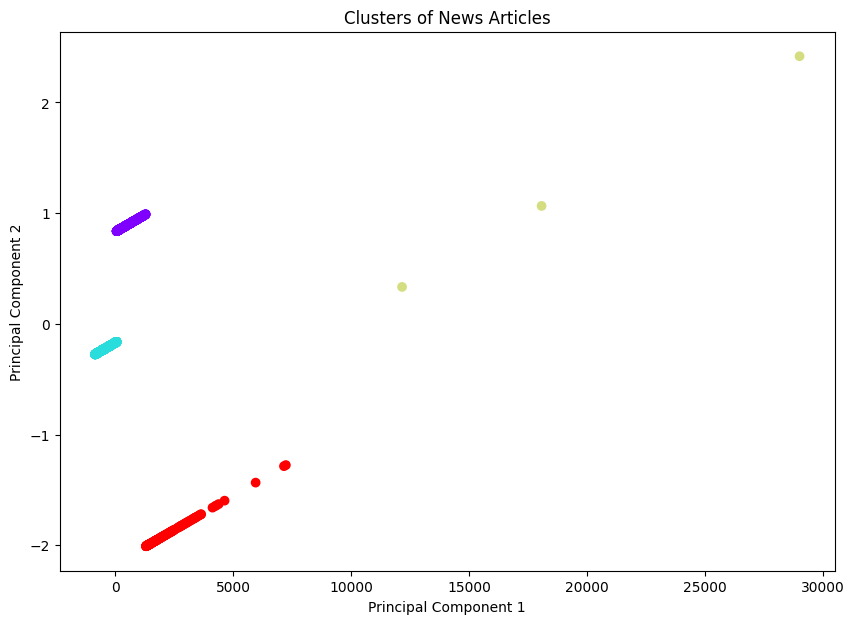

In [38]:
# # Visualizing the clusters (optional)
# from sklearn.decomposition import PCA

# # Reduce dimensionality for visualization
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(df_length)

# plt.figure(figsize=(10, 7))
# plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df_length['cluster'], cmap='rainbow')
# plt.title('Clusters of News Articles')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

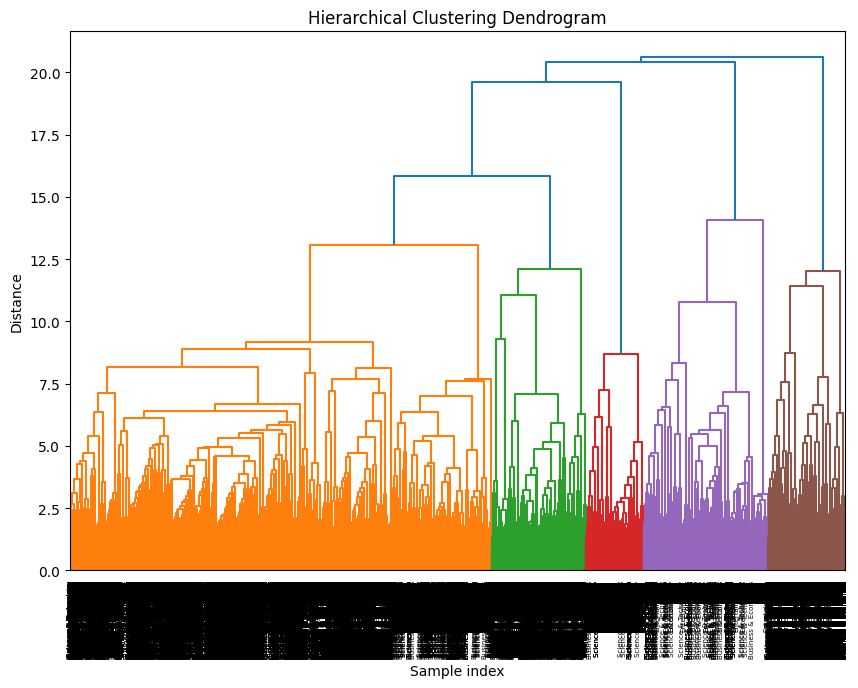

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import pandas as pd

# Load your data
data = pd.read_csv('news_20k.csv')
data['cleaned_text'] = data['News Text'].str.lower().str.strip()

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Reduced features for visualization
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Using the linkage function to perform hierarchical clustering
linked = linkage(tfidf_features.toarray(), 'ward')  # 'ward' minimizes the variance of clusters being merged

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=data['Category'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


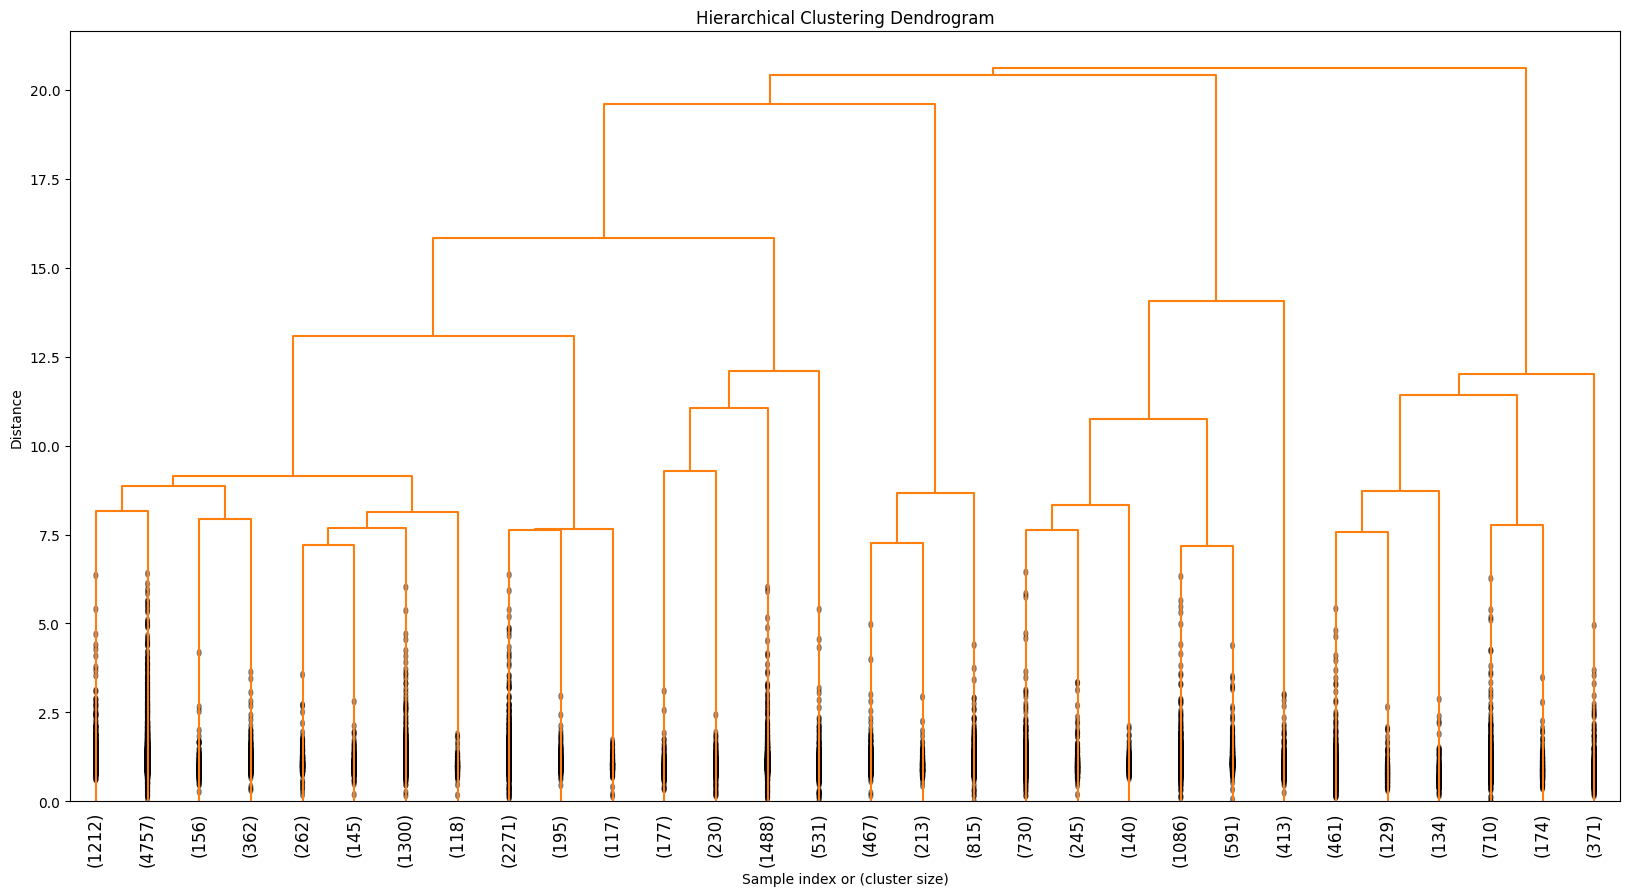

In [ ]:
plt.figure(figsize=(20, 10))  # Larger figure size
dendrogram(linked,
           truncate_mode='lastp',  # Show only the last p merged clusters
           p=30,  # Show only the last 30 merged clusters
           leaf_rotation=90,  # Rotate labels for better readability
           leaf_font_size=12,  # Increase font size for better readability
           show_contracted=True,  # To get a better feel for the data's distribution
           orientation='top',
           labels=data['Category'].values,
           distance_sort='descending',
           color_threshold=40)  # Sets the color threshold for clustering
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

In [ ]:
!pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 15.1 MB/s eta 0:00:00
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20728 sha256=49974ce7d340b57091bdd41b5359ba32a355b0d49dfefe22949ae826aebb4633
  Stored in directory: /root/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd412d03
Successfully built mplcursors
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


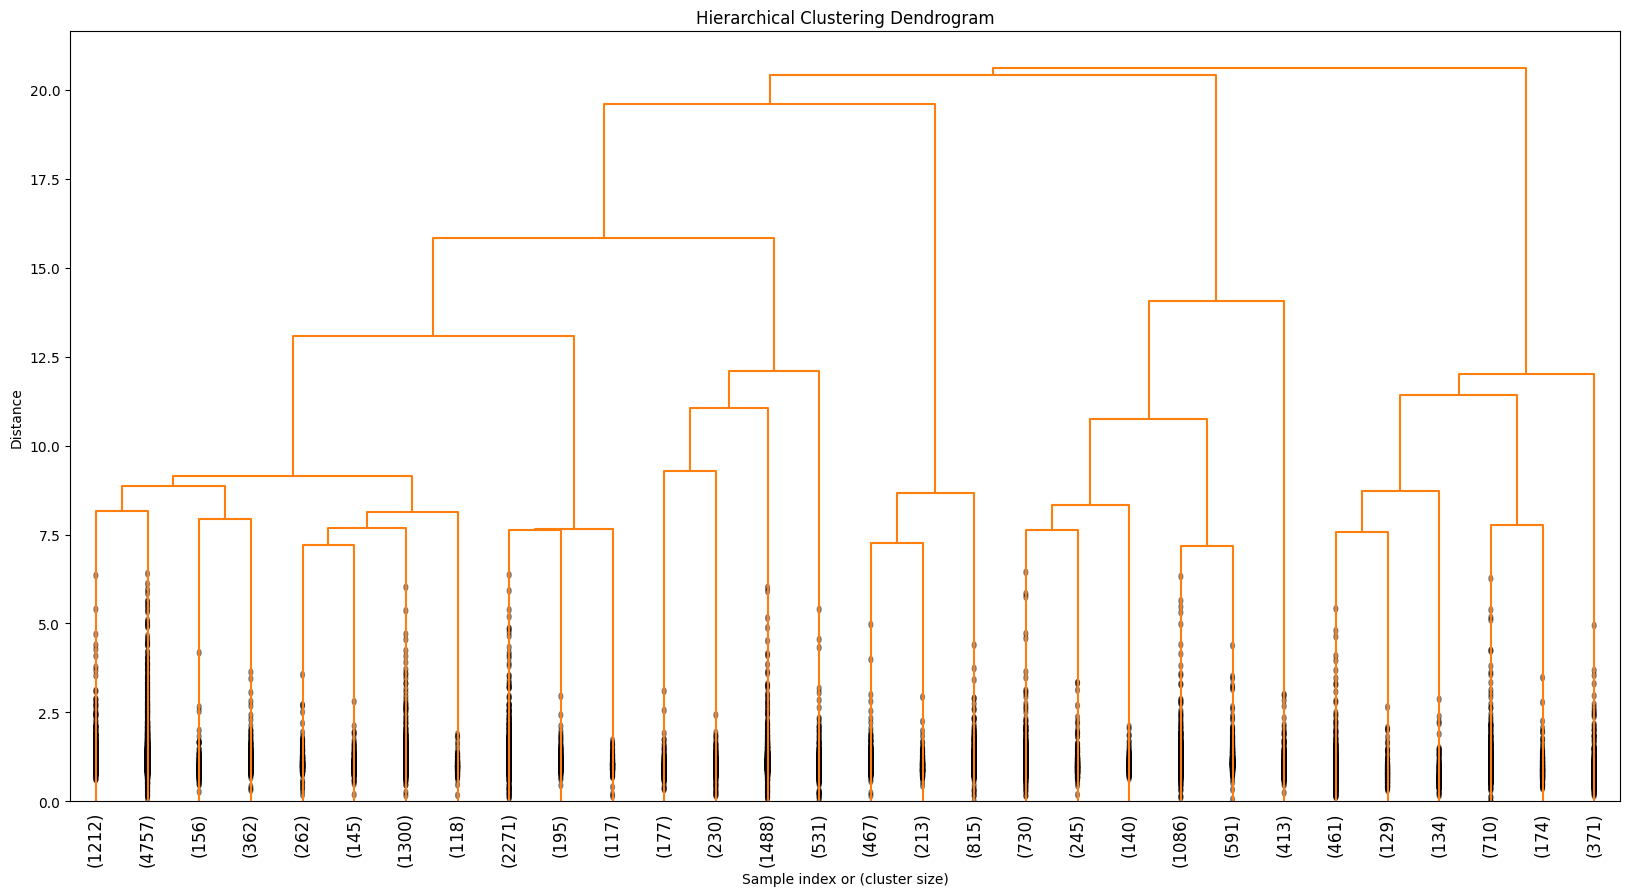

In [ ]:
import mplcursors
# Create a matplotlib figure
plt.figure(figsize=(20, 10))
dendrogram(linked,
           truncate_mode='lastp',  # Show only the last p merged clusters
           p=30,  # Show only the last 30 merged clusters
           leaf_rotation=90,  # Rotate labels for better readability
           leaf_font_size=12,  # Increase font size for better readability
           show_contracted=True,  # To get a better feel for the data's distribution
           orientation='top',
           labels=data['Category'].values,
           distance_sort='descending',
           color_threshold=40)  # Sets the color threshold for clustering
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')

# Add interactivity with mplcursors
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))

plt.ion()
plt.show()

In [ ]:
### Takes time Due to desnity and no of features
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import DBSCAN
# import pandas as pd
# import numpy as np

# # Load your data
# data = pd.read_csv('news_20k.csv')
# data['cleaned_text'] = data['News Text'].str.lower().str.strip()

# # Initialize the TF-IDF Vectorizer
# tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Optimal feature count for DBSCAN
# tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# # Initialize DBSCAN
# dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')

# # Fitting the DBSCAN algorithm on the vectorized text
# clusters = dbscan.fit_predict(tfidf_features)

# # Adding cluster labels to your dataframe
# data['Cluster'] = clusters

# # Save or examine your clustered data
# data.to_csv('dbscan_clustered_news.csv', index=False)
# print(np.unique(clusters, return_counts=True))


In [ ]:
data = pd.read_csv('news_20k.csv')

In [ ]:
# Let's first check the distribution of the categories in the dataset
category_distribution = data['Category'].value_counts()
category_distribution


Category
Business & Economics    5000
Entertainment           5000
Science & Technology    5000
Sports                  5000
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Cleaning the text: simple cleaning by lowering the case and removing extra spaces
data['cleaned_text'] = data['News Text'].str.lower().str.strip()

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'],
    data['Category'],
    test_size=0.2,
    random_state=42
)

# Initializing the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fitting the vectorizer on the training data and transforming both train and test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Encoding the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Display the shape of the transformed training data and test data
X_train_tfidf.shape, X_test_tfidf.shape


((16000, 10000), (4000, 10000))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train_tfidf, y_train_encoded)

# Predicting the categories on the test set
y_pred = model.predict(X_test_tfidf)

# Calculating accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)

# Generating a classification report to see precision, recall, and F1-score
classification_rep = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

accuracy, classification_rep


(0.94175,
 '                      precision    recall  f1-score   support\n\nBusiness & Economics       0.93      0.93      0.93       995\n       Entertainment       0.97      0.94      0.95      1024\nScience & Technology       0.89      0.94      0.91      1004\n              Sports       0.98      0.97      0.97       977\n\n            accuracy                           0.94      4000\n           macro avg       0.94      0.94      0.94      4000\n        weighted avg       0.94      0.94      0.94      4000\n')

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train_tfidf, y_train_encoded)

# Predicting the categories on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Calculating accuracy
accuracy_nb = accuracy_score(y_test_encoded, y_pred_nb)

# Generating a classification report to see precision, recall, and F1-score
classification_rep_nb = classification_report(y_test_encoded, y_pred_nb, target_names=label_encoder.classes_)

accuracy_nb, classification_rep_nb


(0.92825,
 '                      precision    recall  f1-score   support\n\nBusiness & Economics       0.92      0.92      0.92       995\n       Entertainment       0.94      0.94      0.94      1024\nScience & Technology       0.88      0.91      0.89      1004\n              Sports       0.98      0.95      0.96       977\n\n            accuracy                           0.93      4000\n           macro avg       0.93      0.93      0.93      4000\n        weighted avg       0.93      0.93      0.93      4000\n')